<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Lena Pickartz (11330741)
* Date:   23.10.2024

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [2]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

# Data Set 1: Heart Attack Data (Resting Blood Pressure and Cholesterol)

In [8]:
pip install kneed

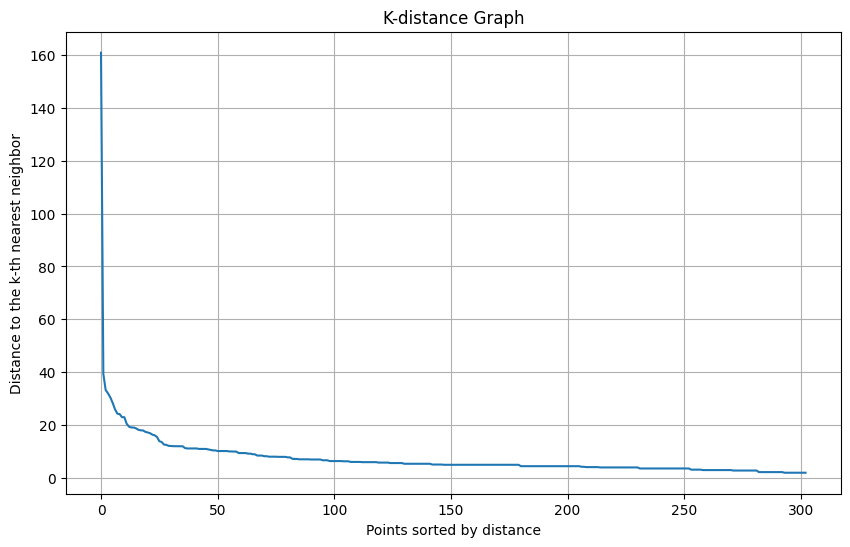

Optimal eps: 19.4164878389476


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator

# Access the dataset
url_1 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/heart.csv'
df_1 = pd.read_csv(url_1)

# Select the 'trtbps' (resting blood pressure) and 'chol' (cholesterol) columns
# and drop any rows with missing values
blood_data_2d = df_1[['trtbps', 'chol']].dropna()

# Convert the selected columns to a 2D array for clustering
blood_X1 = blood_data_2d.values

# Parameters
minPts = 4  # Rule of thumb for minPts: minPts = 2 * dimensions, so here we use 4

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(blood_X1)
distances, indices = nbrs.kneighbors(blood_X1)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # sensitivity parameter for detecting the knee
    curve="convex",                    # the curve shape we are expecting
    direction="decreasing"             # the direction of the knee
)

# Determine optimal eps from the knee point
optimal_eps = distance_desc[kneedle.knee - 1] if kneedle.knee else None
print(f'Optimal eps: {optimal_eps}')

# Apply DBSCAN with the determined eps
outlier_detection = DBSCAN(min_samples=minPts, eps=eps)
clusters = outlier_detection.fit_predict(X)

Number of outliers: 60
Number of clusters: 31


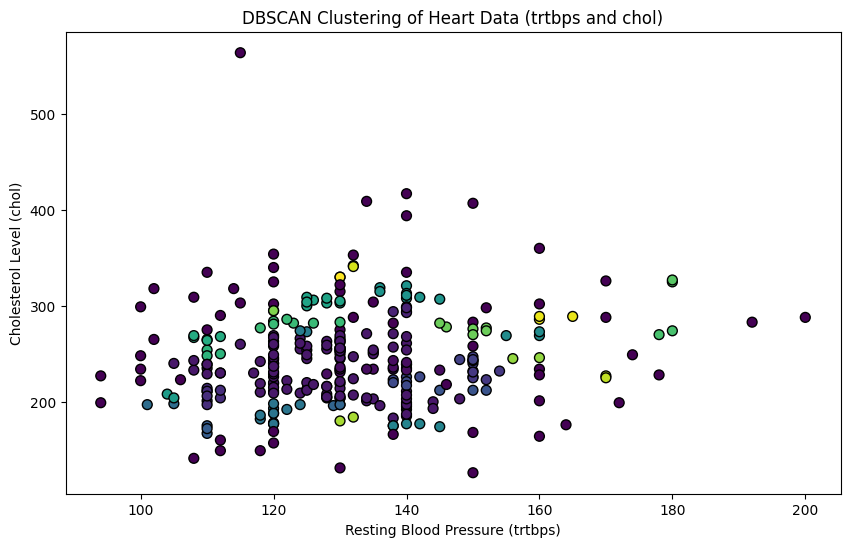

In [26]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 5

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(blood_X1)

# Count outliers (noise points labeled as -1)
outliers_count = list(clusters).count(-1)
print(f'Number of outliers: {outliers_count}')

# Count the number of unique clusters (excluding noise)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Number of clusters: {num_clusters}')

# Plot the clusters for visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title("DBSCAN Clustering of Heart Data (trtbps and chol)")
plt.xlabel('Resting Blood Pressure (trtbps)')
plt.ylabel('Cholesterol Level (chol)')
plt.show()

# Observation

The outlier detection using DBScan resulted in identifying 60 outliers and 31 clusters based on resting blood pressure and cholesterol levels. The high number of outliers suggests variability or unusual points in the data, possibly indicating measurement errors or unique health profiles among patients.

# Data Set 2: Weight of Babies

In [12]:
#Access the dataset (Source = https://www.kaggle.com/datasets/danbraswell/temporary-us-births)
url_2 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/us_births_2016_2021.csv'

# Load the dataset
df_2 = pd.read_csv(url_2)

# Extract the weight column and drop missing values
baby_weight_data = df_2['Average Birth Weight (g)'].dropna()

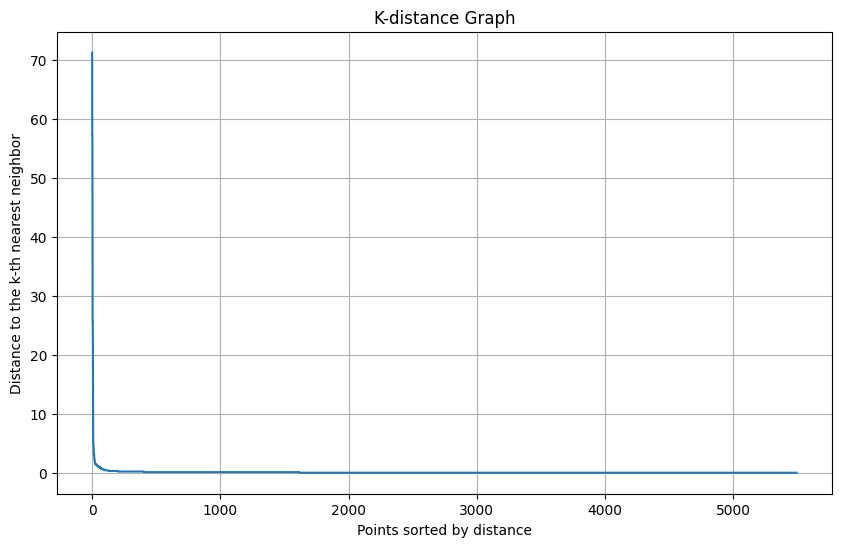

Optimal eps: 28


In [13]:
# Reshape the data to a 2D array
X_2 = baby_weight_data.values.reshape(-1, 1)

# Parameters
minPts = 2

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_2)
distances, indices = nbrs.kneighbors(X_2)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # parameter suggested from paper
    curve="convex",                   # parameter from figure
    direction="decreasing"            # parameter from figure
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

In [14]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 28

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(X_2)

list(clusters).count(-1)

4

# Observation

# Data Set 3: Renewable Power Production France

In [15]:
#Access the dataset (Source = https://www.kaggle.com/datasets/henriupton/wind-solar-electricity-production)
url_3 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/wip/data/intermittent-renewables-production-france.csv'

# Load the dataset
df_3 = pd.read_csv(url_3)

# Extract the production in MWh column and drop missing values
renewable_energy_data = df_3['Production'].dropna()

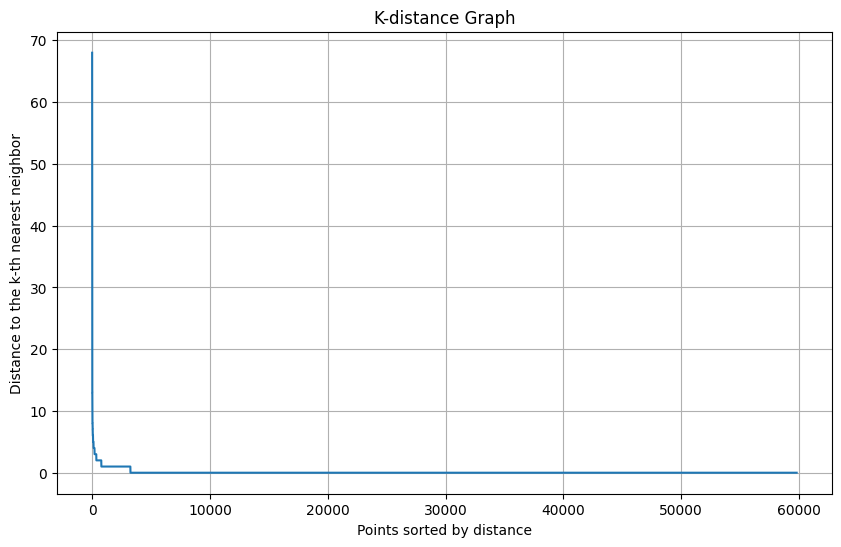

Optimal eps: 9


In [16]:
# Reshape the data to a 2D array
X_3 = renewable_energy_data.values.reshape(-1, 1)

# Parameters
minPts = 2

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_3)
distances, indices = nbrs.kneighbors(X_3)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # parameter suggested from paper
    curve="convex",                   # parameter from figure
    direction="decreasing"            # parameter from figure
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

In [17]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 9

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(X_3)

list(clusters).count(-1)

22

# Oberservation


# General Observation on DBScan

The exact knee point isn’t always clear, and sometimes there’s ambiguity. Especially in Dataset 2 (Babies Weight) the calculated EPS (Kneedle Knee) seems to be off if you compare the number to the K-Distance graph. As all three datasets are low dimensional data (two features, 2D).

We therefore will perform a DBScan with all dimensionalities of the heart attack dataset and see how the clusters change.

# DBScan with all 14 dimensions of Heart Attack data

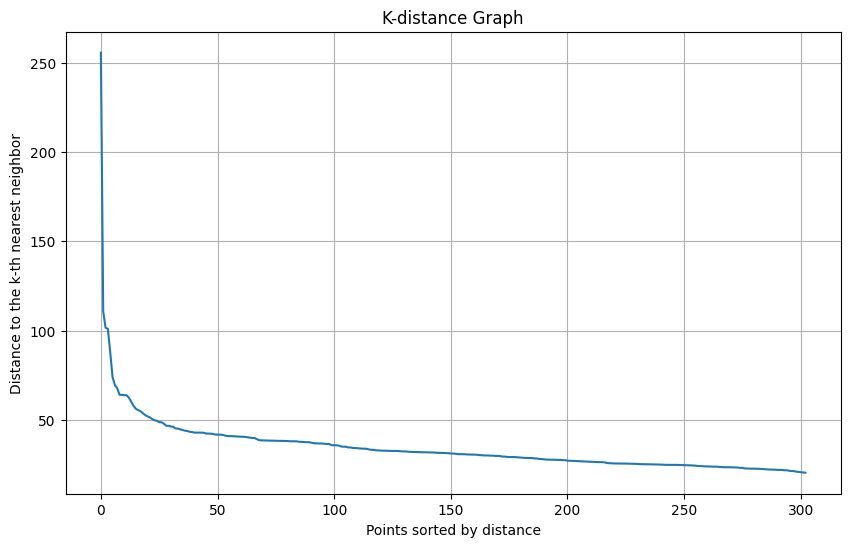

Optimal eps: 9
Number of outliers: 303
Number of clusters: 0


In [31]:
# Select all relevant columns
# Columns: age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output
feature_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
                   'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
heart_rate_data = df_1[feature_columns].dropna()

# Convert data to a 2D array
blood_X2 = heart_rate_data.values

# Parameters
minPts = 28  # Minimum number of points in a neighborhood to form a dense region

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(blood_X2)
distances, indices = nbrs.kneighbors(blood_X2)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # sensitivity parameter
    curve="convex",                    # shape of curve in graph
    direction="decreasing"             # graph direction
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

# Apply DBSCAN with estimated eps
minPts = 28  # Adjust as necessary based on rule of thumb (minPts ≈ 2 * dimensionality)
eps = optimal_eps

outlier_detection = DBSCAN(min_samples=minPts, eps=eps)
clusters_heart = outlier_detection.fit_predict(blood_X2)

# Count noise points and clusters
num_outliers_heart = list(clusters_heart).count(-1)
num_clusters_heart = len(set(clusters_heart)) - (1 if -1 in clusters else 0)

print(f'Number of outliers: {num_outliers_heart}')
print(f'Number of clusters: {num_clusters_heart}')

DBScan struggles in higher-dimensional spaces because distances become less meaningful, and the density concept becomes harder to apply. The K-distance graph is less reliable for choosing eps in high-dimensional datasets.

In [37]:
# Apply DBSCAN with manually set eps
minPts = 28  # Adjust as necessary based on rule of thumb (minPts ≈ 2 * dimensionality)
eps = 30
outlier_detection = DBSCAN(min_samples=minPts, eps=eps)
clusters_heart = outlier_detection.fit_predict(blood_X2)

# Count noise points and clusters
num_outliers_heart = list(clusters_heart).count(-1)
num_clusters_heart = len(set(clusters_heart)) - (1 if -1 in clusters else 0)

print(f'Number of outliers: {num_outliers_heart}')
print(f'Number of clusters: {num_clusters_heart}')

Number of outliers: 5
Number of clusters: 1
